In [10]:
from textblob import TextBlob
from sklearn.metrics import *
import csv
import  matplotlib.pyplot as plt
import numpy as np

In [11]:
blob =[]
labels=[]
with open("/Users/swtoskon/Downloads/twitter-2016test-A-clean.tsv") as fd :
    next(fd)
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    for row in rd:
        blob.append(TextBlob(row[2]))
        if row[1]=='positive':
            labels.append(1)
        elif row[1]=='neutral':
            labels.append(0)
        elif row[1]=='negative':
            labels.append(-1)

In [12]:
pred=[]
x=-0.75
y=0.25
for b in blob:
    if b.sentiment.polarity>y:
        pred.append(1)
    elif b.sentiment.polarity<x:
        pred.append(-1)
    elif b.sentiment.polarity>=x and b.sentiment.polarity<=y:
        pred.append(0)

In [13]:
ac = accuracy_score(labels,pred)
print("Accuracy is " + str(ac))

Accuracy is 0.5753625966391924


In [14]:
precision=precision_score(labels, pred, average=None)
print("Precision is " + str(precision))
recall = recall_score(labels, pred, average=None)
print("recall is " + str(recall)) 
f1=f1_score(labels, pred, average=None)
print("f-score is " + str(f1))
confusion_matrix = confusion_matrix(labels,pred)
print("Confusion matrix : \n" + str(confusion_matrix))

Precision is [0.63636364 0.56431642 0.6064945 ]
recall is [0.03030303 0.83722414 0.43111596]
f-score is [0.05785124 0.67420001 0.50398385]
Confusion matrix : 
[[  70 1951  289]
 [  26 6563 1250]
 [  14 3116 2372]]


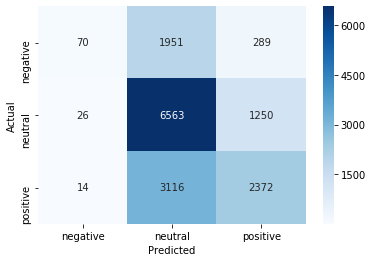

In [16]:
import seaborn as sns
import pandas as pd
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(['negative', 'neutral','positive']), index = np.unique(['negative', 'neutral','positive']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')
